In [ ]:
import numpy as np
import pandas as pd


In [ ]:
df = pd.read_csv("/content/spam.csv",encoding = "latin-1")
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [ ]:
#Data Cleaning

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
#drop last three columns

In [ ]:
df.drop(columns=["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], inplace = True)

In [ ]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
df.rename(columns={"v1":"Target", "v2":"Text"}, inplace = True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [ ]:
df["Target"]=encoder.fit_transform(df["Target"])

In [ ]:
#missing values

In [ ]:
df.isnull().sum()

Target    0
Text      0
dtype: int64

In [ ]:
#Duplicate values

In [ ]:
df.duplicated().sum()

403

In [ ]:
df = df.drop_duplicates(keep = "first")

In [ ]:
df.duplicated().sum()

0

In [ ]:
df

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [ ]:
#EDA

In [ ]:
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df["Target"].value_counts()

0    4516
1     653
Name: Target, dtype: int64

In [ ]:
import matplotlib.pyplot as plt

([<matplotlib.patches.Wedge at 0x7d4e8f9def80>,
 [Text(-1.0144997251399075, 0.42519443516002464, 'Not spam'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001339, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

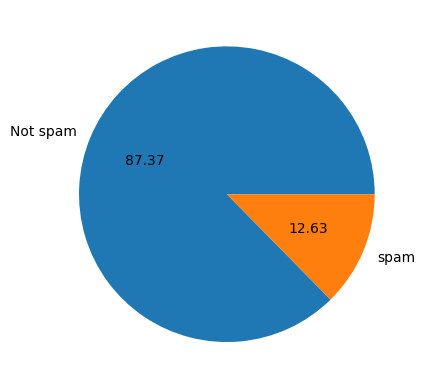

In [ ]:
plt.pie(df["Target"].value_counts(), labels = ["Not spam", "spam"], autopct = "%0.2f")

In [ ]:
#Data is imbalanced

In [ ]:
import nltk

In [ ]:
!pip install nltk

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
df["num_characters"]=df["Text"].apply(len)

<ipython-input-202-19d82c7a2c2f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["num_characters"]=df["Text"].apply(len)


In [ ]:
#number of words

In [ ]:
df["num_word"]=df["Text"].apply(lambda x: len(nltk.word_tokenize(x)))

<ipython-input-204-e8b58550e0f9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["num_word"]=df["Text"].apply(lambda x: len(nltk.word_tokenize(x)))


In [ ]:
df["num_sentence"] = df["Text"].apply(lambda x: len(nltk.sent_tokenize(x)))

<ipython-input-205-92b8dc239175>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["num_sentence"] = df["Text"].apply(lambda x: len(nltk.sent_tokenize(x)))


In [ ]:
df[["num_characters", "num_word", "num_sentence"]].describe()

,num_characters,num_word,num_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
#Not spam
df[df["Target"] == 0][["num_characters", "num_word", "num_sentence"]].describe()

,num_characters,num_word,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
#Spam
df[df["Target"]==1][["num_characters", "num_word", "num_sentence"]].describe()

,num_characters,num_word,num_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [ ]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

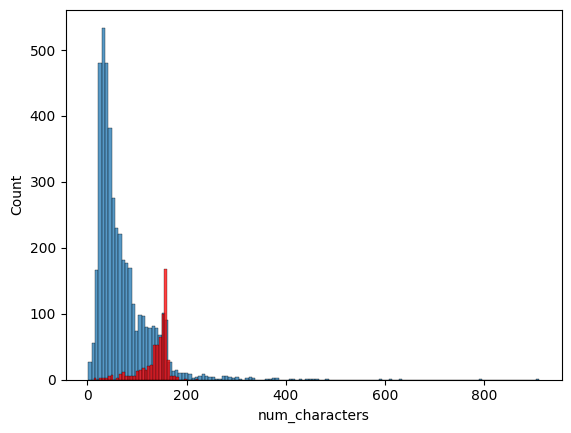

In [ ]:
sns.histplot(df[df["Target"]==0]["num_characters"])
sns.histplot(df[df["Target"]==1]["num_characters"], color = "red")

In [ ]:
#Number of characters in not spam is more than the spam

<Axes: xlabel='num_word', ylabel='Count'>

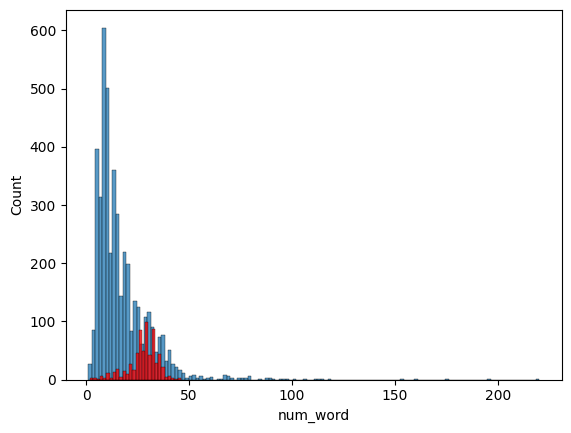

In [ ]:
sns.histplot(df[df["Target"]==0]["num_word"])
sns.histplot(df[df["Target"]==1]["num_word"], color = "red")

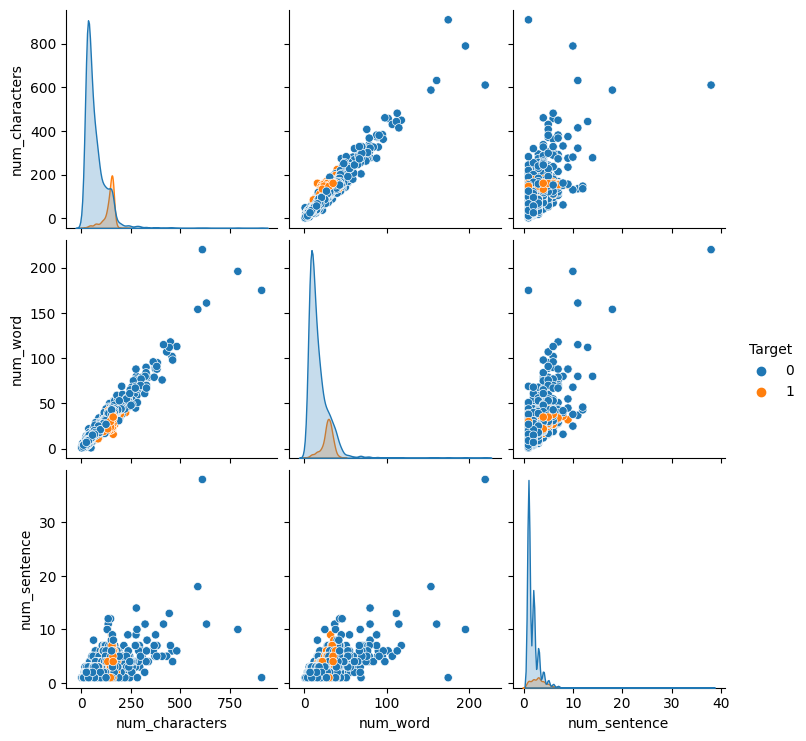

In [ ]:
sns.pairplot(df, hue= "Target")

<ipython-input-214-fe43fffaf13b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)


<Axes: >

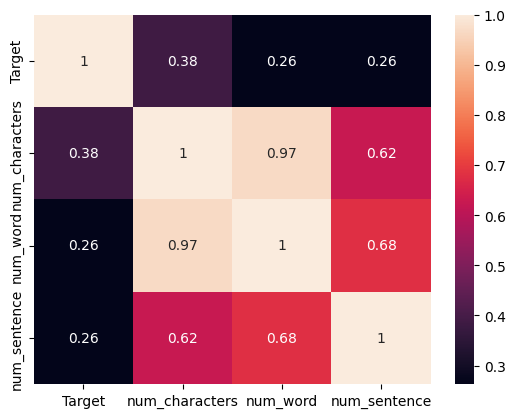

In [ ]:
sns.heatmap(df.corr(), annot = True)

In [ ]:
import string
string.punctuation
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [ ]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords
def transform_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)
  y = []
  for i in text:
    if i.isalnum():
      y.append(i)

  text = y[:]
  y.clear()
  for i in text:
    if i not in stopwords.words("english") and i not in string.punctuation:
      y.append(i)

  text = y[:]
  y.clear()
  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)



In [ ]:
transform_text("I loved the YT lectures on Machine Learning. How about you?")

'love yt lectur machin learn'

In [ ]:
df["transformed_text"]=df["Text"].apply(transform_text)

<ipython-input-219-f8e4987ff6cb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["transformed_text"]=df["Text"].apply(transform_text)


In [ ]:
from wordcloud import WordCloud

In [ ]:
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = "white")

In [ ]:
spam_wc = wc.generate(df[df["Target"]==1]["transformed_text"].str.cat(sep= " "))


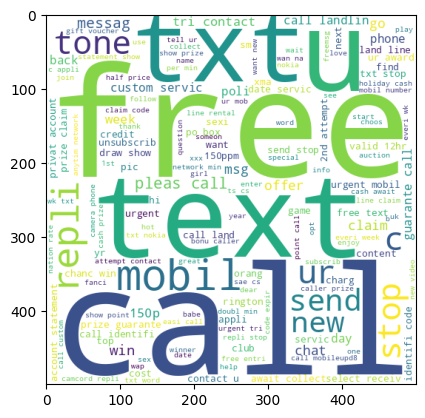

In [ ]:
plt.imshow(spam_wc)

In [ ]:
not_spam_wc = wc.generate(df[df["Target"]==0]["transformed_text"].str.cat(sep= " "))

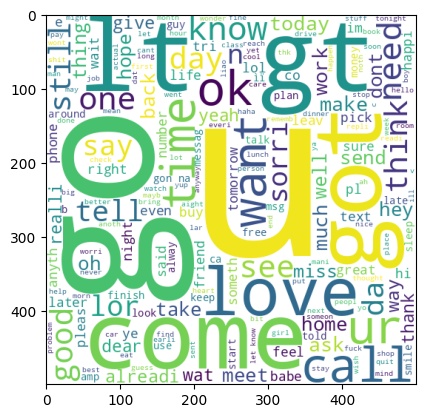

In [ ]:
plt.imshow(not_spam_wc)

In [ ]:
spam_corpus = []
for msg in df[df["Target"]==1]["transformed_text"].tolist():
  for words in msg.split():
    spam_corpus.append(words)

In [ ]:
len(spam_corpus)

9939

In [ ]:
not_spam_corpus = []
for msg in df[df["Target"]==0]["transformed_text"].tolist():
  for words in msg.split():
    not_spam_corpus.append(words)

In [ ]:
len(not_spam_corpus)

35404

In [ ]:
#Model Building

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
df.head()

,Target,Text,num_characters,num_word,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features = 3000)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [ ]:
X = tfidf.fit_transform(df["transformed_text"]).toarray()

In [ ]:
X.shape

(5169, 3000)

In [ ]:
y = df["Target"].values

In [ ]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)

In [ ]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [ ]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [ ]:
gnb.fit(X_train, Y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(Y_test, y_pred1))

0.8626692456479691


In [ ]:
print(confusion_matrix(Y_test, y_pred1))

[[778 115]
 [ 27 114]]


In [ ]:
print(precision_score(Y_test, y_pred1))

0.4978165938864629


In [ ]:
mnb.fit(X_train, Y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(Y_test, y_pred2))

0.9738878143133463


In [ ]:
print(confusion_matrix(Y_test, y_pred2))

[[893   0]
 [ 27 114]]


In [ ]:
print(precision_score(Y_test, y_pred2))

1.0


In [ ]:
bnb.fit(X_train, Y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(Y_test, y_pred3))

0.9738878143133463


In [ ]:
print(confusion_matrix(Y_test, y_pred3))

[[890   3]
 [ 24 117]]


In [ ]:
print(precision_score(Y_test, y_pred3))

0.975


In [ ]:
#Here we have to reduce the False positive

In [ ]:
#tfidf---#mnb

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
svc = SVC(kernel = "sigmoid", gamma = 1)
knc = KNeighborsClassifier()
dtc = DecisionTreeClassifier(max_depth = 5)
lrc = LogisticRegression(solver = "liblinear", penalty = "l1")
rfc = RandomForestClassifier(n_estimators = 50, random_state = 2)
ab = AdaBoostClassifier(n_estimators = 50, random_state = 2)
bc = BaggingClassifier(n_estimators = 50, random_state = 2)
etc = ExtraTreesClassifier(n_estimators = 50, random_state = 2)
gb = GradientBoostingClassifier(n_estimators = 2, random_state = 2)
xgb = XGBClassifier(n_estimators = 50, random_state = 2)

In [ ]:
clfa = {
    "SVC" :svc,
    "KN" : knc,
    "DT" : dtc,
    "LR" : lrc,
    "RF" : rfc,
    "AB" : ab,
    "BC" : bc,
    "ETC" : etc,
    "GB" : gb,
    "XGB" : xgb
}

In [ ]:
def train_classifier(clf, X_train, Y_train, X_test, Y_test):
  clf.fit(X_train, Y_train)
  y_pred = clf.predict(X_test)
  accuracy = accuracy_score(Y_test, y_pred)
  precision = precision_score(Y_test, y_pred)
  return accuracy, precision

In [ ]:
train_classifier(svc, X_train, Y_train, X_test, Y_test)

(0.9661508704061895, 0.9274193548387096)

In [ ]:
accuracy_scores = []
precision_scores = []
for name, clf in clfa.items():
  current_accuracy, current_precision = train_classifier(clf, X_train, Y_train, X_test, Y_test)
  print("For ", name)
  print("Accuracy", current_accuracy)
  print("Precision", current_precision)

  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)

For  SVC
Accuracy 0.9661508704061895
Precision 0.9274193548387096
For  KN
Accuracy 0.902321083172147
Precision 0.9761904761904762
For  DT
Accuracy 0.9294003868471954
Precision 0.8469387755102041
For  LR
Accuracy 0.9400386847195358
Precision 0.883495145631068
For  RF
Accuracy 0.9622823984526112
Precision 1.0
For  AB
Accuracy 0.9584139264990329
Precision 0.9152542372881356
For  BC
Accuracy 0.9564796905222437
Precision 0.8870967741935484
For  ETC
Accuracy 0.9700193423597679
Precision 0.9910714285714286


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  GB
Accuracy 0.8636363636363636
Precision 0.0
For  XGB
Accuracy 0.960348162475822
Precision 0.923728813559322


In [ ]:
df_final = pd.DataFrame({"Algorithm":clfa.keys(), "Accuarcy":accuracy_scores, "Precision":precision_scores}).sort_values("Precision", ascending = False)

In [ ]:
df_final

,Algorithm,Accuarcy,Precision
4,RF,0.962282,1.000000
7,ETC,0.970019,0.991071
1,KN,0.902321,0.976190
0,SVC,0.966151,0.927419
9,XGB,0.960348,0.923729
5,AB,0.958414,0.915254
6,BC,0.956480,0.887097
3,LR,0.940039,0.883495
2,DT,0.929400,0.846939
8,GB,0.863636,0.000000


In [ ]:
#model improve
#Change the max_features parameters of TfIdf

In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
voting = VotingClass